# **Explarotory Analysis for US car accidents**

# Data Preparation 


1. Load the file using Pandas.
2. Look at preliminary information or summary statistics.
3. Fix any missing/incorrect values.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# For ML 
import sklearn

# For KNN model
from sklearn.neighbors import KNeighborsClassifier

# For Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Load a file in a variable


# filepath = '/content/drive/MyDrive/US_Accidents_Dec21_updated.csv'
filepath = '/content/drive/MyDrive/CIS 710 /data/US_Accidents_Dec21_updated.csv'
# reading csv file using pandas
data_frame = pd.read_csv(filepath)
data_frame

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
# list the columns

for col in data_frame.columns:
  print(col)

ID
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Number
Street
Side
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight


In [7]:
# summary stats of the numeric columns

data_frame.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [9]:
# check for missing values in the data_set

# converts everything to True (if there are missing values), False otherwise

data_frame.isna()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2845338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2845339,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2845340,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# we need the total numbers of each column in descending order
data_frame.isna().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [6]:
# percentage share of missing values for each colunm in the entire data

missing_percentage = data_frame.isna().sum().sort_values(ascending = 
                                                         False) / len(data_frame)
missing_percentage

# sort out the one with zeros 
missing_percentage[missing_percentage != 0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

From the above results we observe that the colunms 'Number', 'Precipitation(in)'and 'Wind_Chill(F)' have the most missing values (20-60% of the data). 




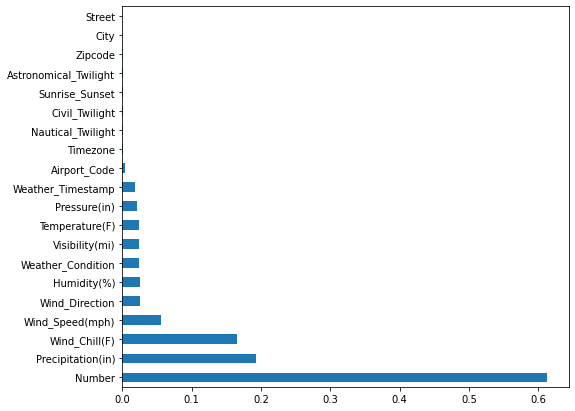

In [13]:
# Visualize horizontal bar chart from the above results without eliminating the missing values

plt.figure(figsize=(8,7))
missing_percentage[missing_percentage != 0].plot(kind = 'barh')

In [7]:
# drop the unwanted columns and rows

clean_df=data_frame.drop(['ID', 'Description', 'Number', 'Country', 'Wind_Chill(F)', 'Precipitation(in)',  'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)
clean_df["Wind_Speed(mph)"].fillna("0", inplace=True)
clean_df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,R,...,False,False,False,False,False,False,False,False,False,Night
1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,I-70 E,R,...,False,False,False,False,False,False,False,False,False,Night
2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,I-75 S,R,...,True,False,False,False,False,False,False,False,False,Night
3,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,I-77 N,R,...,False,False,False,False,False,False,False,False,False,Night
4,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,R,...,False,False,False,False,False,False,False,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,Pomona Fwy E,R,...,False,False,False,False,False,False,False,False,False,Day
2845338,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,I-8 W,R,...,False,False,False,False,False,False,False,False,False,Day
2845339,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,Garden Grove Fwy,R,...,True,False,False,False,False,False,False,False,False,Day
2845340,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,San Diego Fwy S,R,...,False,False,False,False,False,False,False,False,False,Day


# State

In [43]:
# Displaying the states

state_values=clean_df['State'].unique()
state_count=clean_df.State.nunique()

print("Total Number of States in data set: ", state_count)
print("\nThe States are: \n", state_values)

Total Number of States in data set:  49

The States are: 
 ['OH' 'IN' 'KY' 'WV' 'MI' 'PA' 'CA' 'NV' 'MN' 'TX' 'MO' 'CO' 'OK' 'LA'
 'KS' 'WI' 'IA' 'MS' 'NE' 'ND' 'WY' 'SD' 'MT' 'NM' 'AR' 'IL' 'NJ' 'GA'
 'FL' 'NY' 'CT' 'RI' 'SC' 'NC' 'MD' 'MA' 'TN' 'VA' 'DE' 'DC' 'ME' 'AL'
 'NH' 'VT' 'AZ' 'UT' 'ID' 'OR' 'WA']


Observation -  It shows that this data consists of all the 49 states of the United States. All the states are abbrevated and their full names are given below for future references-
Alabama	-AL	; Kentucky	KY	; Ohio	OH;
Alaska	AK	;Louisiana	LA	;Oklahoma	OK;
Arizona	AZ;	Maine	ME;	Oregon	OR;
Arkansas	AR;	Maryland	MD;	Pennsylvania	PA;
American Samoa	AS;	Massachusetts	MA;	Puerto Rico	PR;
California	CA;	Michigan	MI;	Rhode Island	RI;
Colorado	CO;	Minnesota	MN;	South Carolina	SC;
Connecticut	CT;	Mississippi	MS;	South Dakota	SD;
Delaware	DE;	Missouri	MO;	Tennessee	TN;
District of Columbia	DC;	Montana	MT;	Texas	TX;
Florida	FL;	Nebraska	NE;	Trust Territories	TT;
Georgia	GA;	Nevada	NV;	Utah	UT;
Guam	GU;	New Hampshire	NH;	Vermont	VT;
Hawaii	HI;	New Jersey	NJ;	Virginia	VA;
Idaho	ID;	New Mexico	NM;	Virgin Islands	VI;
Illinois	IL;	New York	NY;	Washington	WA;
Indiana	IN;	North Carolina	NC;	West Virginia	WV;
Iowa	IA;	North Dakota	ND;	Wisconsin	WI;
Kansas	KS;	Northern Mariana Islands	MP;	Wyoming	WY



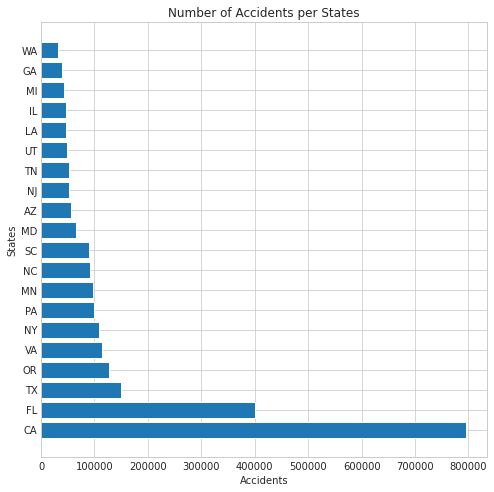

In [44]:
# Bar graph showing the State with maximum number of accidents

x=clean_df['State'].value_counts().sort_values(ascending=False)[:20]
plt.figure(figsize=(8,8))
plt.barh(x.index, x)
plt.ylabel('States')
plt.xlabel('Accidents')
plt.title('Number of Accidents per States')
plt.show()

Observation - This result shows that California state has the most number of accidents from year 2016-2021.

# Side

In [45]:
# This shows the total number of sides along with the count of accidents for each of those sides

a = clean_df['Side'].unique()
b = clean_df['Side'].value_counts()
print("Values of the Driving Side: ", a)
print("\nCount of each side:\n",b)
print("\n",b.index)

Values of the Driving Side:  ['R' 'L' 'N']

Count of each side:
 R    2353309
L     492032
N          1
Name: Side, dtype: int64

 Index(['R', 'L', 'N'], dtype='object')


Observation - This result shows the count of accidents that occured on the left side, right side and none - which is not defined....

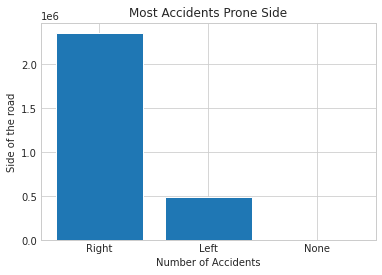

In [48]:
# Bar graph to show SIDE of the accidents


plt.bar(['Right','Left', 'None'], b)
plt.xlabel('Number of Accidents')
plt.ylabel('Side of the road')
plt.title('Most Accidents Prone Side')
plt.show()

Observation - This visually presents that most of the accidents has occured on the right side of the road.

#Stacked Plot -  Bivariate Visualization of categorical variables

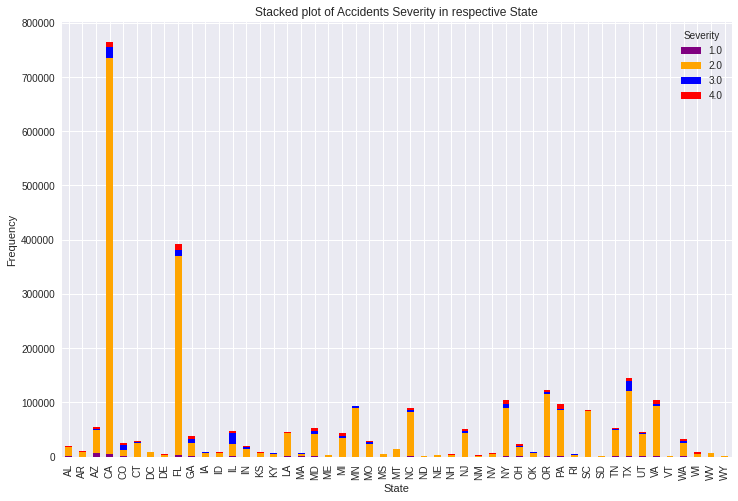

In [53]:
# create a frequency table of state against severity 

categorial_var = pd.crosstab(columns=clean_df['Severity'],

                             index=clean_df['State'])



# plot a stacked plot

categorial_var.plot(kind='bar', stacked=True, figsize=(12,8),

                    color=['purple', 'orange', 'blue', 'red', 'green'])

plt.title('Stacked plot of Accidents Severity in respective State')

plt.ylabel('Frequency')

plt.show()

Observation - This presents the increase in number of accidents with respect to year. It can be seen that the reported number of accidents in 2021 were more than 1.4 million which is way higher than the reported accidents from 2020.

# Severity (shown using pie chart and Map)

In [9]:
# Severity 

c=clean_df['Severity'].unique()
print("Measure of Severity: ", c)

d=clean_df['Severity'].value_counts()
print("\nCount of Severity\n", d)

Measure of Severity:  [3 2 4 1]

Count of Severity
 2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64


Observation - This shows the categories that we have telling how severe the accident was. With 1 being the least severe and 4 being highly severe.

Text(0.5, 1.0, 'Severity of Accidents')

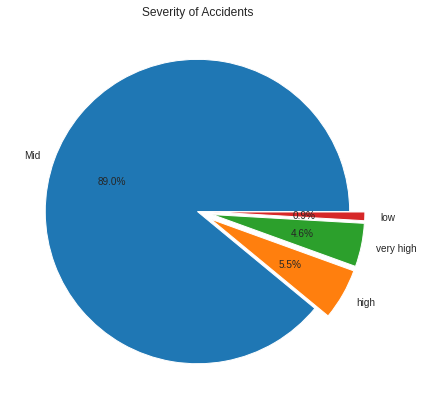

In [51]:
# display pie chart for severity 

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,7))
plt.pie(d, labels=['Mid', 'high', 'very high', 'low'], explode=[0, 0.1, 0.1, 0.1], autopct='%1.1f%%')
plt.title('Severity of Accidents')

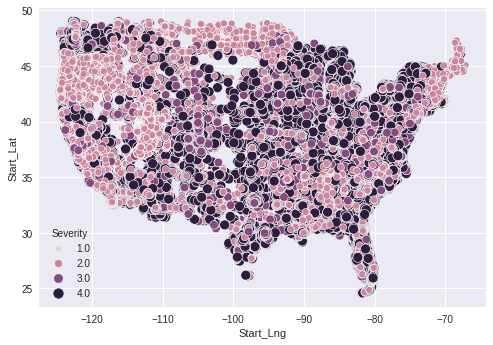

In [54]:
sns.scatterplot(x=clean_df.Start_Lng,y=clean_df.Start_Lat,data=clean_df,size=clean_df.Severity, hue=clean_df.Severity)

Observation - This Visualizes that the accidents of the mid severity are very high.

# HeatMap

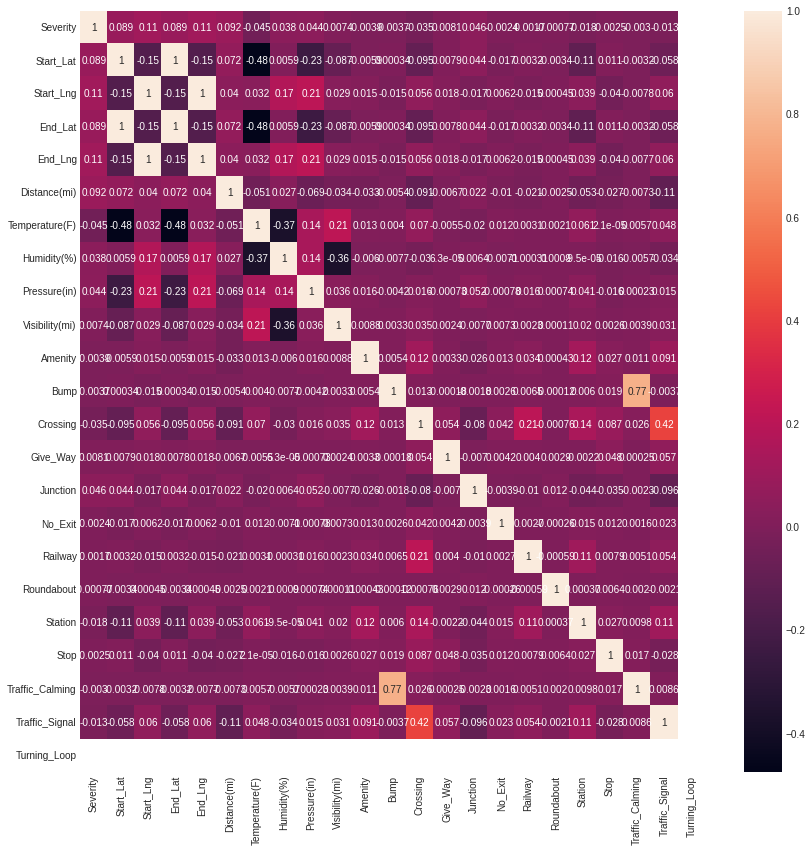

In [52]:
plt.figure(figsize=(14,14))
sns.heatmap(clean_df.corr(), annot = True, fmt='.2g')

Observation - The heat map shows the correlation among all the different attributes. Start_Lat and End_Lat along with Start_Lng and End_Lng presents the highest positive correlaion of 1, followed by Crossing with Traffic signal presenting the positive corelation of 0.42; and Temperature with Start_Lat as well as Temperature with End_Lat persents the most negative corelation of -0.48.

# City

In [53]:
# City

cities = clean_df.City.unique()
cities_count_accident = clean_df['City'].value_counts()

print("Number of Cities: ", len(cities))
print("\nTotal number of accident in each City: \n", cities_count_accident)

Number of Cities:  11682

Total number of accident in each City: 
 Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64


Observation - This counts the accidents with respect to cities and tells us that Miami is the city with most accidents.

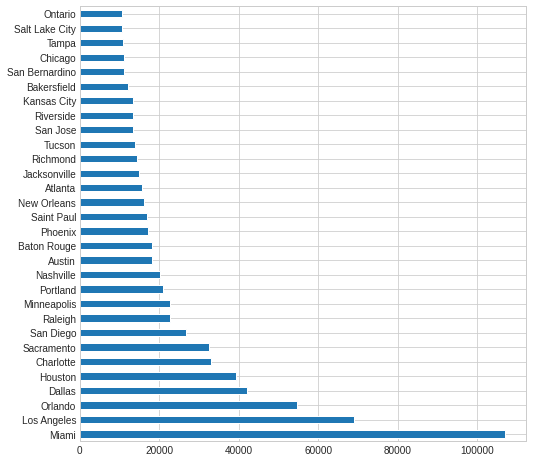

In [54]:
# Visualize the top 30 cities.

plt.figure(figsize=(8,8))
cities_count_accident[:30].plot(kind = 'barh')


Observation - This graph visualizes the top 30 cities wth the most accidents, Miami being the number 1.

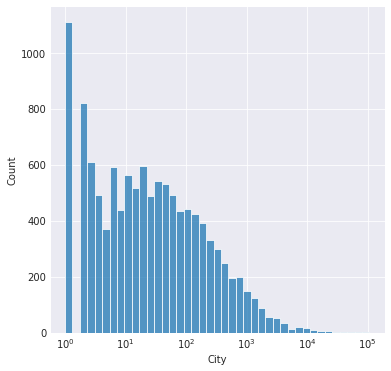

In [55]:
# Ditribution of cities by number of accidents 

plt.figure(figsize=(6,6))
sns.set_style("darkgrid")

# plotting a histogram with a logarithmic scale
sns.histplot(cities_count_accident, log_scale=True)

Observation - Over 1200 cities have reported only one accident during the entire period. This could either be very good news or it could be a result of missing data. Let’s break cities by accidents into two groups and see their respective distributions-

Percentage high accidents:  4.245848313644924


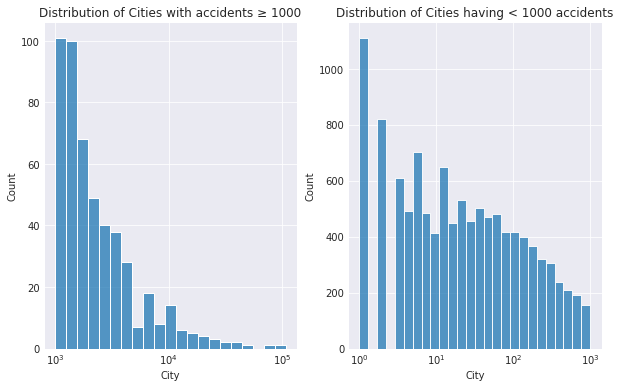

In [56]:
# High accidents where the number of accidents is greater and equal to 1000
high_accident_cities = cities_count_accident[cities_count_accident >= 1000]

# low accidents cities where the number is less than 1000
low_accident_cities = cities_count_accident[cities_count_accident < 1000]

# Percentage of high accident cities
percentage_high_accidents_cities = len(high_accident_cities)/len(cities) * 100 
print("Percentage high accidents: ", percentage_high_accidents_cities)


plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.title('Distribution of Cities with accidents ≥ 1000')
sns.histplot(high_accident_cities, log_scale= True)

plt.subplot(1,2,2)
plt.title('Distribution of Cities having < 1000 accidents')
sns.histplot(low_accident_cities, log_scale=True)



Observation -
1. For High

Almost 100 cities (out of 11682) reported more than 1000 accidents during the period between Feruary 2016 and December 2020. 

2. For Low

*   Over 1100 cities have had just one accident in 4 years - needs furthur
investigation. 
*   The majority of them have witnessed between 10-100 accidents during the period
*   Accidents by cities follow an exponentially decreasing distribution.






# Start Time

In [57]:
# covert to timestamp type and override the original column 

clean_df.Start_Time = pd.to_datetime(clean_df.Start_Time)

# We want to know time of the day witnesses more accidents. 
# We pull the hour from the timestamp format (extract hour from timestamp)
clean_df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


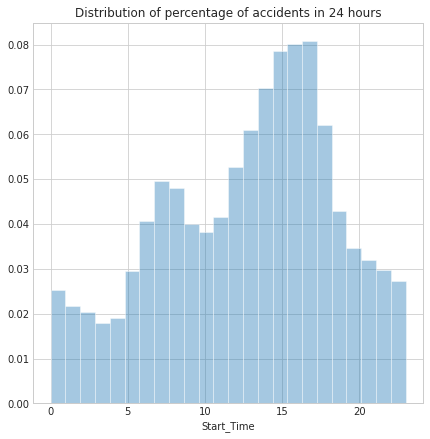

In [58]:
# plot the distribution

sns.set_style('whitegrid')
plt.figure(figsize=(7,7))
plt.title('Distribution of percentage of accidents in 24 hours')

sns.distplot(clean_df.Start_Time.dt.hour, bins = 24, kde = False, norm_hist= True)

Observation -
There is one peak of time:

*   Between 3 pm to 6pm. The rush hours could be leading to more accidents 



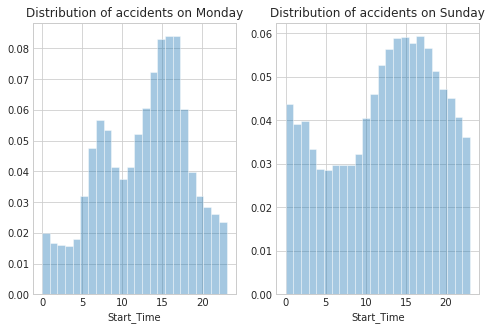

In [59]:
# Monday and Sunday comparison


plt.figure(figsize=(8,5))

# plot the distribution for Monday
plt.subplot(1,2,1)

monday_start_time = clean_df.Start_Time[clean_df.Start_Time.dt.dayofweek == 0]
plt.title('Distribution of accidents on Monday')
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

# plot the distribution for sunday
plt.subplot(1,2,2)

sunday_start_time = clean_df.Start_Time[clean_df.Start_Time.dt.dayofweek == 6]
plt.title('Distribution of accidents on Sunday')
sns.distplot(sunday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)



Observation - 
While Monday follows the general 24-hour pattern- two peaks coinciding with work rush; the distribution for Sunday sees a peak between 10 am and 4 pm. This could be due to people going out for leisurely activities on Sundays.

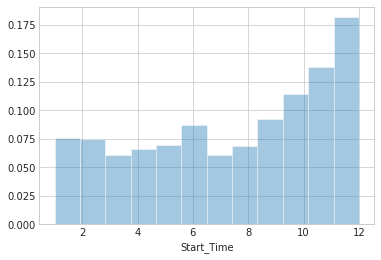

In [60]:
# monthly distribution of accidents

sns.distplot(clean_df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

Observation-
There seems to be a steady upward curve from the second half of the year, This could possibly be due to summer break and then the new school term around August-September. 

#Temperature

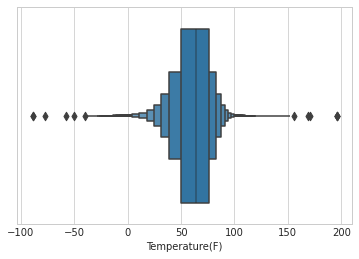

In [61]:
#This presents the boxplot for the temperature 
sns.boxenplot(x = clean_df['Temperature(F)'])

Observation - This shows that most of the accidents takes place in between 50-60 degrees F.


# Word Cloud


In [62]:
from wordcloud import WordCloud

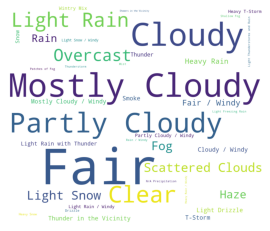

In [63]:
#This code below is going to calcualte the frequency of each word in weather condition and plot a word cloud for that
data = clean_df['Weather_Condition'].value_counts().to_dict()
length = WordCloud(width = 1000, height = 850, background_color='White', min_font_size= 9).generate_from_frequencies(data)
plt.imshow(length)
plt.axis('off')
plt.show()

Observation - This shows that the most frequent words that are used for Weather Condition is Fair, followed by Mostly Cloudy, Cloudy, Partly Cloudy.

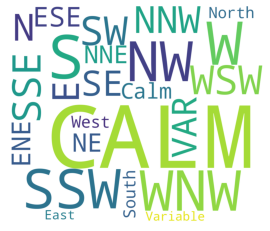

In [64]:
#This code below is going to calcualte the frequency of each word in wind DIrection and plot a word cloud for that
data = clean_df['Wind_Direction'].value_counts().to_dict()
length = WordCloud(width = 1000, height = 850, background_color='White', min_font_size= 9).generate_from_frequencies(data)
plt.imshow(length)
plt.axis('off')
plt.show()

Observation - This shows that the most frequent word seen when accidents took place is that the wind direction was Calm.

#Map - Total accidents

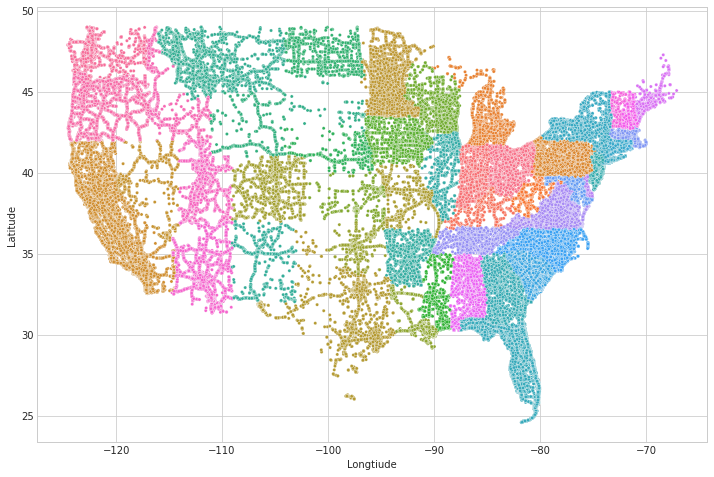

In [65]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Start_Lng", y="Start_Lat", hue="State", data=clean_df, s=10, legend=False)
plt.xlabel("Longtiude")
plt.ylabel("Latitude")
plt.show()

Obervation - This shows the occurence of accidents on map. 

#Statistical Inference - Machine Learning

A model is constructed to predict the severity of accidents within a particular city and state.
This is achieved by using means of Logistic Regression Analysis and K-Nearest-Neighbors.
For now, we are only going to take a look at one city, which is wisconsin, because the data is really huge.

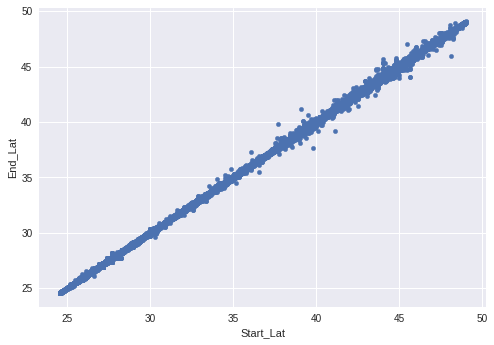

In [10]:
plt.style.use('seaborn')
clean_df.plot(x = 'Start_Lat', y='End_Lat', kind = 'scatter')
plt.show()

Observation - It can be seen that both the Variables, Start_Lat and End_lat shows positive correlation

In [12]:
#Next step is to convert these Start_Time and End_Time into dataframes
clean_df['Start_Time'] = pd.to_datetime(clean_df['Start_Time'], errors = 'coerce')
clean_df['End_Time'] = pd.to_datetime(clean_df['End_Time'], errors = 'coerce')

#dividing the date and time to subsets of their categories
clean_df['Year'] = clean_df['Start_Time'].dt.year
clean_df['Month'] = clean_df['Start_Time'].dt.strftime('%b')
clean_df['Day'] = clean_df['Start_Time'].dt.day
clean_df['Hour'] = clean_df['Start_Time'].dt.hour
clean_df['Weekday'] = clean_df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
time_d='Time_Duration(min)'
clean_df[time_d]=round((clean_df['End_Time']-clean_df['Start_Time'])/np.timedelta64(1,'m'))


# To see if there are any outliers for our time
clean_df[time_d][clean_df[time_d]<=0]

#to make sure there are not aby null values in our time_d, we are going to replace that with our outliers using median values
n=3

median = clean_df[time_d].median()
std = clean_df[time_d].std()
outliers = (clean_df[time_d] - median).abs() > std*n

clean_df[outliers] = np.nan

# Include NA 
clean_df[time_d].fillna(median, inplace=True)

In [13]:
#computing the mean of all the null values in our cleaned datta set
clean_df.isnull().mean()

Severity              0.000558
Start_Time            0.000558
End_Time              0.000558
Start_Lat             0.000558
Start_Lng             0.000558
End_Lat               0.000558
End_Lng               0.000558
Distance(mi)          0.000558
Street                0.000558
Side                  0.000558
City                  0.000606
County                0.000558
State                 0.000558
Zipcode               0.001021
Timezone              0.001843
Airport_Code          0.003913
Weather_Timestamp     0.018380
Temperature(F)        0.024878
Humidity(%)           0.026220
Pressure(in)          0.021353
Visibility(mi)        0.025324
Wind_Direction        0.026458
Wind_Speed(mph)       0.000558
Weather_Condition     0.025356
Amenity               0.000558
Bump                  0.000558
Crossing              0.000558
Give_Way              0.000558
Junction              0.000558
No_Exit               0.000558
Railway               0.000558
Roundabout            0.000558
Station 

In [32]:
# Convert datetime to string/object
clean_df['Start_Time']=clean_df['Start_Time'].astype(str)

clean_df['End_Time']=clean_df['End_Time'].astype(str)

In [43]:
#Extracting the data for one state for our model 
state = 'CT'
select_state = clean_df.loc[clean_df.State == state].copy()
select_state.drop('State', axis = 1, inplace = True)
select_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29409 entries, 31581 to 2844969
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Severity            29409 non-null  float64
 1   Start_Time          29409 non-null  object 
 2   End_Time            29409 non-null  object 
 3   Start_Lat           29409 non-null  float64
 4   Start_Lng           29409 non-null  float64
 5   End_Lat             29409 non-null  float64
 6   End_Lng             29409 non-null  float64
 7   Distance(mi)        29409 non-null  float64
 8   Street              29409 non-null  object 
 9   Side                29409 non-null  object 
 10  City                29409 non-null  object 
 11  County              29409 non-null  object 
 12  Zipcode             29409 non-null  object 
 13  Timezone            29409 non-null  object 
 14  Airport_Code        29409 non-null  object 
 15  Weather_Timestamp   29409 non-null  object 
 16

In [44]:
#selecting the city 
city = 'Hartford'
select_city = clean_df.loc[clean_df.City==city].copy()
select_city.drop('City', axis=1, inplace=True)
select_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 24509 to 2844966
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Severity            2864 non-null   float64
 1   Start_Time          2864 non-null   object 
 2   End_Time            2864 non-null   object 
 3   Start_Lat           2864 non-null   float64
 4   Start_Lng           2864 non-null   float64
 5   End_Lat             2864 non-null   float64
 6   End_Lng             2864 non-null   float64
 7   Distance(mi)        2864 non-null   float64
 8   Street              2864 non-null   object 
 9   Side                2864 non-null   object 
 10  County              2864 non-null   object 
 11  State               2864 non-null   object 
 12  Zipcode             2864 non-null   object 
 13  Timezone            2864 non-null   object 
 14  Airport_Code        2864 non-null   object 
 15  Weather_Timestamp   2864 non-null   object 
 16 

In [45]:
#converting our data into dummy variables, to put that into model
df_city_dummy = pd.get_dummies(select_city, drop_first = True)
df_city_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 24509 to 2844966
Columns: 5523 entries, Severity to Weekday_Wed
dtypes: float64(14), uint8(5509)
memory usage: 15.4 MB


In [46]:
#The code written below will tell us what the shape of our model is going to be
clean_df.dropna(subset=clean_df.columns[clean_df.isnull().mean()!=0], how='any', axis=0, inplace=True)
clean_df.shape

(2732151, 44)

In [47]:
#Now we can assign the data and create two seperate data sets, our training and testing.
# Here we assign our dataframe we started with to the dummy variable we will be using. 
df=df_city_dummy

# Our target will be the severity of car accidents
target='Severity'


y = df[target] 
X = df.drop(target, axis=1)  
X = np.nan_to_num(X)  # NaN to numeric value 


# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [48]:
accuracy = []

#Logistic Regression


In [49]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

acc = accuracy_score(y_test,y_pred)

accuracy.append(acc)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#KNN (K-Nearest-Neighbors)

In [50]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over values of n_neighbor(k)  # change n_neighbor to k 
for i, k in enumerate(neighbors):
    
    # Setup a k-NN Classifier with n_neighbor
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

#Final Fitted Models of Logistic Regression and KNN (K-Nearest Neighbors)

In [51]:
print("The accuracy percentage of our Logistic Regression algorithm is {:.3f}.".format(acc))

The accuracy percentage of our Logistic Regression algorithm is 0.878.


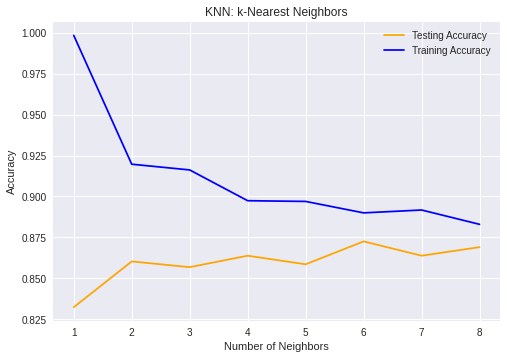

In [52]:
plt.title('KNN: k-Nearest Neighbors')
plt.plot(neighbors, test_accuracy, color= "orange", label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, color="blue", label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Observation - Our KNN modeled graph has an accuracy percentage of roughly 87 percent, which is excellent for a model. Both our testing and training accuracy provide highly comparable outcomes because they follow similar patterns, implying that they correlate with one another. We can also confirm that there is no overfitting.

The neighbor in the KNN method's name simply indicates how closely our training and testing variables compare to one another. Using this model expands the scope of the investigation by revealing the parallels between our X and Y. This neural network enables us to anticipate the types of accidents that may occur and how they may occur.

# Results



* In most circumstances, the weather seems to be "Fair" or "Mostly Cloudy.", hence it is not a major cause behind the accidents.
* Most of the accidents occur when the temperature is in between 50-60 degrees Fahrenheit.
*This tells that majority of accidents have severity ~2 means not much higher impact on traffic.
*Miami(CITY) had most no of accident cases i.e 106966
*Top 5 Cities which had most number of cases are
  -Miami 106966 
  -Los Angeles 68956
  -Orlando 54691
  -Dallas 41979
  -Houston 39448
*Cities which had least no of accidents are
  -Ridgedale 1
  -Sekiu 1
  -Wooldridge 1
  -Bullock 1
  -American Fork-Pleasant Grove 1
*CA (STATE) had most no of accident cases i.e 795868
*Top 5 States of US which had most no accident cases are:
  -CA 795868
  -FL 401388
  -TX 149037
  -OR 126341
  -VA 113535
*Most accident occurs between 2:00PM - 6:00PM
*most-deadliest accident hour is 5:00PM
*next highest accident occur between 7:00AM - 8:00AM
*friday had the highest no of accident cases i.e 492074.
*accident cases are less during weekends i.e satuday and sunday and evenly distributed during business days.
*Most no of cases are occured during December i.e 473943
*at the end of the year the number of accidents is quite high ie during december,november,october had most no of accidents
*year 2021 had max no of accidents i.e 1511745
*trend is increasing exponentially yearly .
sharp rise after year 2020.
*maximum no of cases occured between temperature range: 50-80 F.




